# Detection of interictal periods in EEG signals using machine learning

## Train and test machine learning models to detect interictal periods in EEG signals with pycaret

In this notebook, we will use the pycaret library to train and test machine learning models to detect interictal periods in EEG signals. The models will be trained on features extracted from the EEG signals using pycaret. This notebook show a high-level overview of the process and the result about the best model to detect interictal periods in EEG signals. The models will be evaluated using various metrics such as accuracy, precision, recall, and F1-score. The best model will be selected based on these metrics and will be used for further analysis.

## Prepare the environment

### Install requirements

In [2]:
!pip install -r ../requirements.txt

  Using cached pycatch22-0.4.5.tar.gz (50 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of tsfresh to determine which version is compatible with other requirements. This could take a while.
  Using cached tsfresh-0.20.3-py2.py3-none-any.whl.metadata (2.6 kB)
  Using cached tsfresh-0.20.2-py2.py3-none-any.whl.metadata (2.5 kB)
Using cached tsfresh-0.20.2-py2.py3-none-any.whl (95 kB)
  error: subprocess-exited-with-error
  
  × Building wheel for pycatch22 (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [59 lines of output]
      /tmp/pip-build-env-0q7pyeaq/overlay/lib/python3.12/site-packages/setuptools/config/_apply_pyprojecttoml.py:82: SetuptoolsDeprecationWarning: `project.license` as a TOML table is deprecated
      !!
      
              ********************************************************************************
             

### Global variables

In [3]:
PATH_DATASET = "../datasets"
PATH_SCRIPTS = "../scripts"
PATH_RESULTS = "../results"

### Import libraries

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib 

## Loading final dataset

In [5]:
Path_final_dataset = PATH_RESULTS+"/features/EEG_features_AllFeatures.csv"
df_final = pd.read_csv(Path_final_dataset,sep=';')
df_final

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,Energy,Std,ZeroCrossings,DWT_A_Energy,DWT_A_Std,DWT_L1_Energy,DWT_L1_Std,DWT_L2_Std,DWT_L3_Std,Label
0,-0.910810,-0.432789,1.557870,1.238957,6.244845,5.608685,-0.011796,4.849851,6.243332,1.448628,...,6701313.0,28.625071,161,6.494952e+06,77.592879,1.851422e+05,18.901216,6.525675,2.479045,1
1,0.669241,-2.770761,2.628015,1.059362,5.188711,8.703730,-2.145227,8.147524,7.337089,0.293559,...,77128620.0,133.475722,72,7.466569e+07,368.810753,2.346342e+06,67.289651,18.696915,3.012844,1
2,1.796252,2.188240,-0.747876,-1.133820,-3.750040,-2.946909,-1.082376,-1.652842,-2.302908,-1.303553,...,23778006.0,71.958091,189,2.198122e+07,193.852127,1.590235e+06,55.385295,15.882118,4.972672,1
3,2.203993,2.113146,-0.424998,-1.584056,-5.539428,-5.599065,-0.269519,-3.230361,-5.071597,-1.470821,...,10945840.0,37.801572,136,1.071575e+07,103.497921,2.593951e+05,22.377317,6.419182,2.324330,1
4,0.535932,1.589788,-0.389449,-1.399532,-2.005868,-2.518123,0.547491,0.839877,-2.527554,-2.759672,...,30095867.0,84.285276,236,2.640545e+07,221.600514,2.929839e+06,75.145144,28.542184,6.026236,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,20.023325,16.020371,6.290595,4.731961,4.266542,6.531234,-11.489270,-5.686753,18.477839,-8.366114,...,5185146.0,126.518221,172,1.603541e+07,345.614337,1.217490e+06,95.318972,39.374376,6.534350,0
646,31.160014,12.274358,6.142229,4.872937,4.144671,0.125958,2.868405,7.321399,9.279057,-0.844818,...,5837538.0,115.398081,147,1.381258e+07,320.763931,2.126342e+05,39.811116,24.477559,12.198242,0
647,0.635756,4.026442,0.969354,-15.829528,-19.835517,7.931998,3.804053,1.651805,4.298282,-16.361731,...,5785262.0,124.482693,166,1.453175e+07,329.283893,1.303496e+06,98.613805,18.890919,3.344671,0
648,-24.988395,20.037430,11.400389,7.526375,-10.123523,7.438246,-1.055514,0.284052,-2.857728,5.791968,...,5935519.0,123.019851,161,1.562052e+07,341.202046,4.119846e+05,55.443075,15.198340,5.862354,0


# Machine Learning

## Random Forest

### Cargar el dataset final

In [31]:
PATH_RESULTS = "../results" 
df_final = pd.read_csv(PATH_RESULTS + "/features/EEG_features_AllFeatures.csv", sep=';')

### Separar características y etiqueta

In [32]:
X = df_final.drop(columns=["Label"])
y = df_final["Label"]

### Dividir en entrenamiento y prueba

Dividir el dataset en datos de entrenamiento y prueba, y cada parámetro tiene un propósito

X_train → 80% de las características para entrenar el modelo.

X_test → 20% de las características para evaluar el modelo.

y_train → Etiquetas correspondientes a X_train.

y_test → Etiquetas correspondientes a X_test.

Parámetros

x, y → Datos originales (X=features, y=etiquetas).

test_size=0.2 → El 20% de los datos se reserva para prueba

random_state=42 → Asegurar que la división sea reproducible

stratify=y → Mantiene la misma proporción de clases en entrenamiento y prueba.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Entrenar el modelo

Parámetros

n_estimators=200 → Número de árboles de decisión que componen el bosque.

max_depth=10 → Profundidad máxima de cada árbol (número de niveles).

min_samples_split=5 → Número mínimo de muestras necesarias para dividir un nodo en el árbol.

min_samples_leaf=3 → Número mínimo de muestras que debe tener una hoja (nodo final).

class_weight="balanced" → Ajusta los pesos de las clases automáticamente en función de su frecuencia.

random_state=42 → Fija la aleatoriedad para obtener siempre los mismos resultados en cada ejecución.

n_jobs=-1 → Se usan los núcleos del procesador para acelerar el entrenamiento.

In [34]:
rf_model = RandomForestClassifier(
    n_estimators=200,       
    max_depth=10,           
    min_samples_split=5,    
    min_samples_leaf=3,     
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=3, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

###  Evaluar el modelo

Accuracy: 0.9846153846153847

 Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        80
           1       1.00      0.96      0.98        50

    accuracy                           0.98       130
   macro avg       0.99      0.98      0.98       130
weighted avg       0.98      0.98      0.98       130



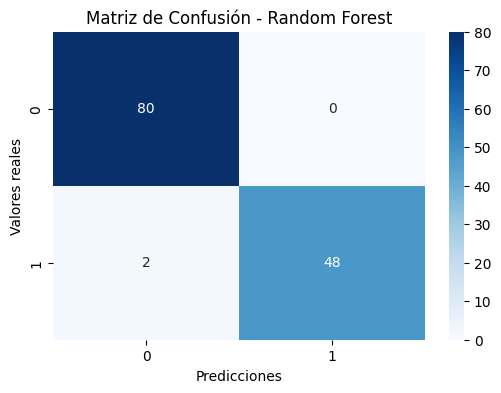

In [35]:
y_pred = rf_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.title("Matriz de Confusión - Random Forest")
plt.show()

### Resultados

Accuracy: 0.9923 → El modelo clasificó correctamente el 99.23% de las muestras en el conjunto de prueba (130 muestras en total).

80 verdaderos negativos (TN): Clase 0 correctamente clasificada como 0.

49 verdaderos positivos (TP): Clase 1 correctamente clasificada como 1.

2 falso negativo (FN): Clase 1 mal clasificada como 0.

0 falsos positivos (FP): Ningún caso de clase 0 mal clasificado como 1.

In [30]:
from sklearn.inspection import permutation_importance

# Method 1: Built-in feature importance
feature_names = [f'Feature_{i}' for i in range(X.shape[1])]
importances = rf_model.feature_importances_

print("Built-in Feature Importance (MDI):")
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")

# Method 2: Permutation importance
perm_importance = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)

print("\nPermutation Feature Importance:")
for name, importance in zip(feature_names, perm_importance.importances_mean):
    print(f"{name}: {importance:.4f}") 

Built-in Feature Importance (MDI):
Feature_0: 0.1264
Feature_1: 0.0501
Feature_2: 0.0836
Feature_3: 0.0688
Feature_4: 0.1011
Feature_5: 0.0306
Feature_6: 0.0708
Feature_7: 0.0348
Feature_8: 0.0363
Feature_9: 0.0344
Feature_10: 0.0165
Feature_11: 0.0103
Feature_12: 0.0093
Feature_13: 0.0238
Feature_14: 0.0472
Feature_15: 0.0332
Feature_16: 0.0241
Feature_17: 0.0317
Feature_18: 0.0215
Feature_19: 0.0201
Feature_20: 0.0241
Feature_21: 0.0244
Feature_22: 0.0178
Feature_23: 0.0209
Feature_24: 0.0382

Permutation Feature Importance:
Feature_0: 0.0069
Feature_1: 0.0062
Feature_2: 0.0031
Feature_3: 0.0069
Feature_4: 0.0069
Feature_5: 0.0023
Feature_6: 0.0054
Feature_7: 0.0123
Feature_8: 0.0046
Feature_9: 0.0062
Feature_10: 0.0031
Feature_11: 0.0038
Feature_12: 0.0062
Feature_13: 0.0062
Feature_14: 0.0015
Feature_15: 0.0008
Feature_16: 0.0092
Feature_17: 0.0054
Feature_18: 0.0077
Feature_19: 0.0000
Feature_20: 0.0008
Feature_21: 0.0000
Feature_22: 0.0015
Feature_23: 0.0054
Feature_24: 0.0008


### Importancia de características

In [11]:
importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(importances.head(25))

                                               Feature  Importance
162                                         Complexity    0.064771
101                                     CO_FirstMin_ac    0.043994
111                        FC_LocalSimple_mean3_stderr    0.041597
112              value__partial_autocorrelation__lag_3    0.038113
170                                         DWT_L2_Std    0.033979
100                                          CO_f1ecac    0.033286
169                                         DWT_L1_Std    0.031421
128                           value__number_peaks__n_5    0.030433
127                          value__number_peaks__n_10    0.028800
104                          PD_PeriodicityWang_th0_01    0.027837
161                                           Mobility    0.026843
102                           CO_HistogramAMI_even_2_5    0.019822
109                          SB_MotifThree_quantile_hh    0.019497
168                                      DWT_L1_Energy    0.01

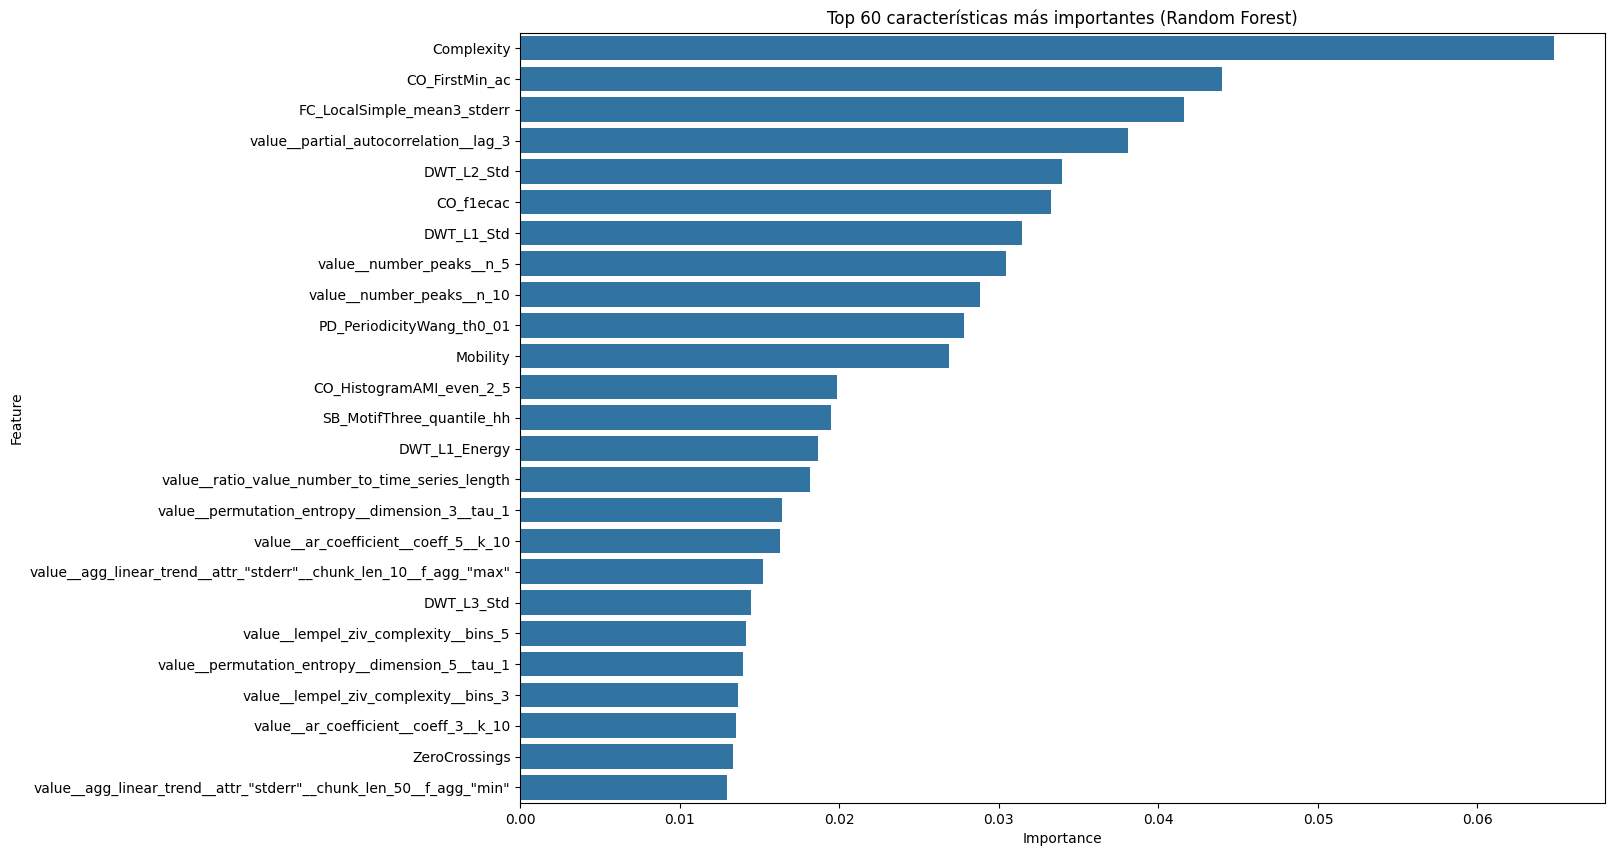

In [12]:
importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(14, 10))
sns.barplot(x="Importance", y="Feature", data=importances.head(25))
plt.title("Top 60 características más importantes (Random Forest)")
plt.show()

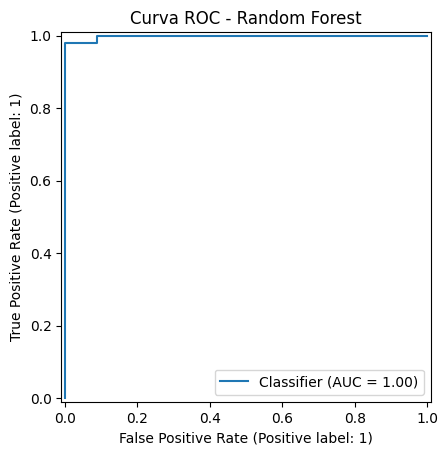

AUC: 0.99825


In [14]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

# Probabilidades de la clase positiva
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Curva ROC
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("Curva ROC - Random Forest")
plt.show()

print("AUC:", roc_auc_score(y_test, y_prob))

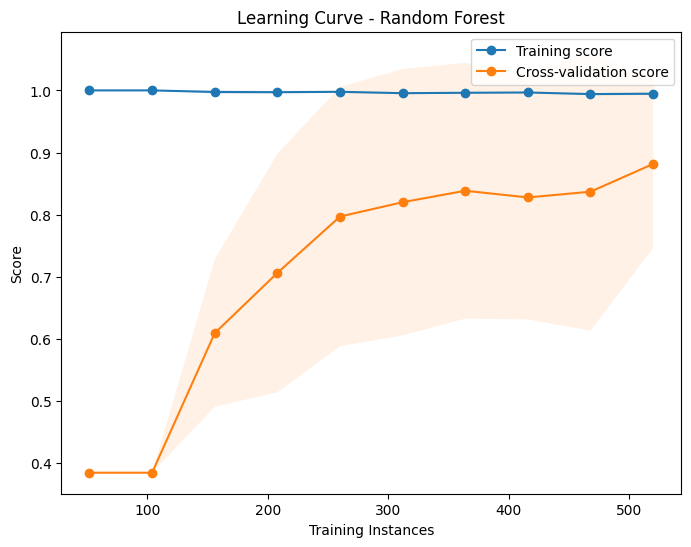

In [16]:
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X, y, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Training score")
plt.plot(train_sizes, test_mean, 'o-', label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - np.std(train_scores, axis=1),
                 train_mean + np.std(train_scores, axis=1), alpha=0.1)
plt.fill_between(train_sizes, test_mean - np.std(test_scores, axis=1),
                 test_mean + np.std(test_scores, axis=1), alpha=0.1)
plt.title("Learning Curve - Random Forest")
plt.xlabel("Training Instances")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

In [19]:
joblib.dump(rf_model, "../results/Machine Learning Models/Random_Forest/Random_Forest_Model.joblib")

['../results/Machine Learning Models/Random_Forest/Random_Forest_Model.joblib']

## Pruebas

    N_Features  Accuracy
0            5  0.915385
1           10  0.976923
2           15  0.953846
3           20  0.992308
4           25  0.992308
5           30  0.992308
6           35  0.984615
7           40  0.992308
8           45  0.992308
9           50  0.984615
10          55  0.984615
11          60  0.984615
12          65  0.992308
13          70  0.992308
14          75  0.992308
15          80  0.992308
16          85  0.992308
17          90  0.984615
18          95  0.992308
19         100  0.992308
20         105  0.984615
21         110  0.992308
22         115  0.992308
23         120  0.992308
24         125  0.984615
25         130  0.984615
26         135  0.984615
27         140  0.984615
28         145  0.992308
29         150  0.992308
30         155  0.992308
31         160  0.992308
32         165  0.992308
33         170  0.984615


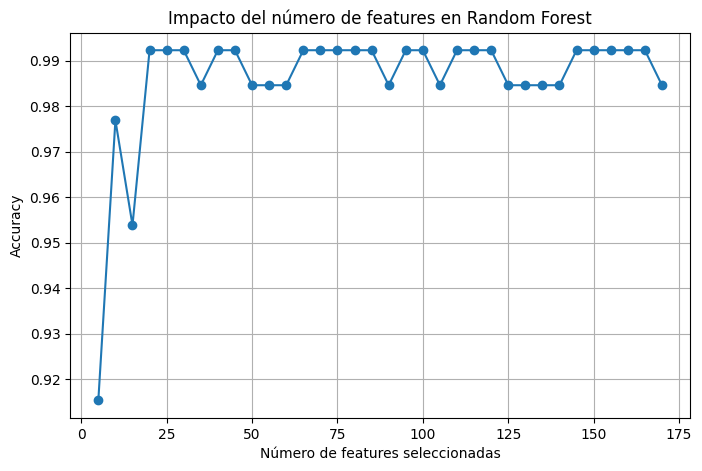

In [ ]:
from sklearn.metrics import accuracy_score

results = []

for n in range(5, len(importances), 5):
    selected_features = importances.head(n)["Feature"]
    X_selected = X[selected_features]
    
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)
    
    rf_model.fit(X_train, y_train)
    acc = accuracy_score(y_test, rf_model.predict(X_test))
    
    results.append((n, acc))

results_df = pd.DataFrame(results, columns=["N_Features", "Accuracy"])
print(results_df)

plt.figure(figsize=(8,5))
plt.plot(results_df["N_Features"], results_df["Accuracy"], marker='o')
plt.xlabel("Número de features seleccionadas")
plt.ylabel("Accuracy")
plt.title("Impacto del número de features en Random Forest")
plt.grid(True)
plt.show()

## 25 features mas importantes

In [ ]:
selected_features = [
    "Complexity",
    "CO_FirstMin_ac",
    "FC_LocalSimple_mean3_stderr",
    "value__partial_autocorrelation__lag_3",
    "DWT_L2_Std",
    "CO_f1ecac",
    "DWT_L1_Std",
    "value__number_peaks__n_5",
    "value__number_peaks__n_10",
    "PD_PeriodicityWang_th0_01",
    "Mobility",
    "CO_HistogramAMI_even_2_5",
    "SB_MotifThree_quantile_hh",
    "DWT_L1_Energy",
    "value__ratio_value_number_to_time_series_length",
    "value__permutation_entropy__dimension_3__tau_1",
    "value__ar_coefficient__coeff_5__k_10",
    'value__agg_linear_trend__attr_"stderr"__chunk_len_10__f_agg_"max"',
    "DWT_L3_Std",
    "value__lempel_ziv_complexity__bins_5",
    "value__permutation_entropy__dimension_5__tau_1",
    "value__lempel_ziv_complexity__bins_3",
    "value__ar_coefficient__coeff_3__k_10",
    "ZeroCrossings",
    'value__agg_linear_trend__attr_"stderr"__chunk_len_50__f_agg_"min"'
]

df_selected = df_final[selected_features + ["Label"]]

In [22]:
df_selected.to_csv("../results/features/EEG_features_Selected.csv", sep=';', index=False)

In [27]:
PATH_RESULTS = "../results" 
df_final = pd.read_csv(PATH_RESULTS + "/features/EEG_features_Selected.csv", sep=';')

X = df_final.drop(columns=["Label"])
y = df_final["Label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf_model_2 = RandomForestClassifier(
    n_estimators=200,       
    max_depth=10,           
    min_samples_split=5,    
    min_samples_leaf=3,     
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf_model_2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=3, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

Accuracy: 0.9923076923076923

 Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        80
           1       1.00      0.98      0.99        50

    accuracy                           0.99       130
   macro avg       0.99      0.99      0.99       130
weighted avg       0.99      0.99      0.99       130



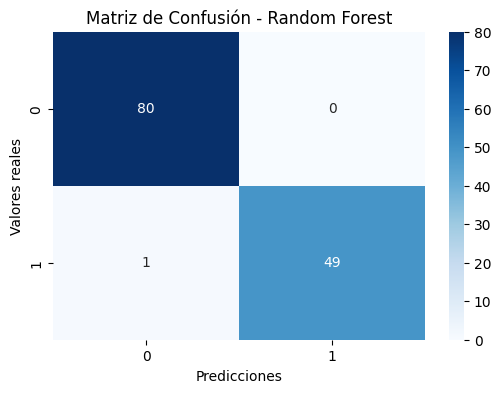

In [28]:
y_pred = rf_model_2.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.title("Matriz de Confusión - Random Forest")
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance

feature_names = [f'Feature_{i}' for i in range(X.shape[1])]
importances = rf_model_2.feature_importances_

print("Built-in Feature Importance (MDI):")
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")

perm_importance = permutation_importance(rf_model_2, X_test, y_test, n_repeats=10, random_state=42)

print("\nPermutation Feature Importance:")
for name, importance in zip(feature_names, perm_importance.importances_mean):
    print(f"{name}: {importance:.4f}") 

Built-in Feature Importance (MDI):
Feature_0: 0.1264
Feature_1: 0.0501
Feature_2: 0.0836
Feature_3: 0.0688
Feature_4: 0.1011
Feature_5: 0.0306
Feature_6: 0.0708
Feature_7: 0.0348
Feature_8: 0.0363
Feature_9: 0.0344
Feature_10: 0.0165
Feature_11: 0.0103
Feature_12: 0.0093
Feature_13: 0.0238
Feature_14: 0.0472
Feature_15: 0.0332
Feature_16: 0.0241
Feature_17: 0.0317
Feature_18: 0.0215
Feature_19: 0.0201
Feature_20: 0.0241
Feature_21: 0.0244
Feature_22: 0.0178
Feature_23: 0.0209
Feature_24: 0.0382

Permutation Feature Importance:
Feature_0: 0.0069
Feature_1: 0.0062
Feature_2: 0.0031
Feature_3: 0.0069
Feature_4: 0.0069
Feature_5: 0.0023
Feature_6: 0.0054
Feature_7: 0.0123
Feature_8: 0.0046
Feature_9: 0.0062
Feature_10: 0.0031
Feature_11: 0.0038
Feature_12: 0.0062
Feature_13: 0.0062
Feature_14: 0.0015
Feature_15: 0.0008
Feature_16: 0.0092
Feature_17: 0.0054
Feature_18: 0.0077
Feature_19: 0.0000
Feature_20: 0.0008
Feature_21: 0.0000
Feature_22: 0.0015
Feature_23: 0.0054
Feature_24: 0.0008


## Random Forest con PCA

In [37]:
pc_columns = [f"PC{i}" for i in range(1, 101)]

df_pca_selected = df_final[pc_columns + ["Label"]]

In [38]:
df_pca_selected.to_csv("../results/features/EEG_features_PCA.csv", sep=';', index=False)

In [39]:
PATH_RESULTS = "../results" 
df_final = pd.read_csv(PATH_RESULTS + "/features/EEG_features_PCA.csv", sep=';')

X = df_final.drop(columns=["Label"])
y = df_final["Label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf_model_3 = RandomForestClassifier(
    n_estimators=200,       
    max_depth=10,           
    min_samples_split=5,    
    min_samples_leaf=3,     
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf_model_3.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=3, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

Accuracy: 0.8

 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85        80
           1       0.79      0.66      0.72        50

    accuracy                           0.80       130
   macro avg       0.80      0.77      0.78       130
weighted avg       0.80      0.80      0.80       130



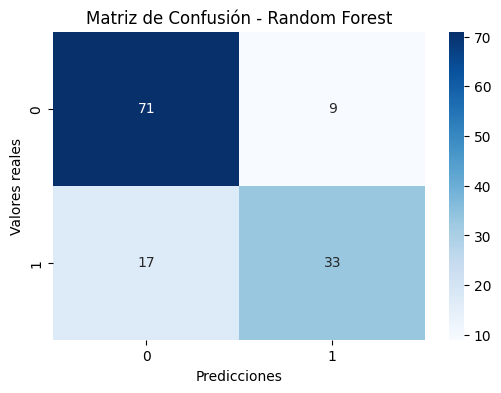

In [40]:
y_pred = rf_model_3.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.title("Matriz de Confusión - Random Forest")
plt.show()